# K-Means Clustering Algorithm
K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. 

K-Means Clustering groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks:

- Determines the best value for K center points or centroids by an iterative process.
- Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

The below diagram explains the working of the K-means Clustering Algorithm:

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png>

## Python Implementation of K-means Clustering Algorithm

### Step-1: Data pre-processing Step
The first step will be the data pre-processing, as we did in our earlier topics of Regression and Classification. But for the clustering problem, it will be different from other models. Let's discuss it:

Importing Libraries
As we did in previous topics, firstly, we will import the libraries for our model, which is part of data pre-processing. The code is given below:

In [1]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [2]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Extracting Independent Variables

x = dataset.iloc[:, [3, 4]].values  


As we can see, we are extracting only 3rd and 4th feature. It is because we need a 2d plot to visualize the model, and some features are not required, such as customer_id.

### Step-2: Finding the optimal number of clusters using the elbow method
In the second step, we will try to find the optimal number of clusters for our clustering problem. So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

C:\Users\jvtay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


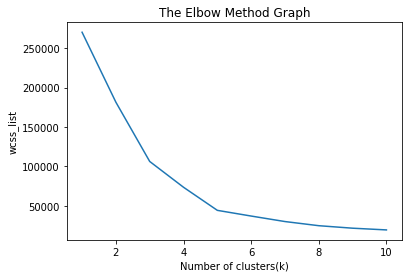

In [5]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

As we can see in the above code, we have used the KMeans class of sklearn. cluster library to form the clusters.

Next, we have created the wcss_list variable to initialize an empty list, which is used to contain the value of wcss computed for different values of k ranging from 1 to 10.

After that, we have initialized the for loop for the iteration on a different value of k ranging from 1 to 10; since for loop in Python, exclude the outbound limit, so it is taken as 11 to include 10th value.

The rest part of the code is similar as we did in earlier topics, as we have fitted the model on a matrix of features and then plotted the graph between the number of clusters and WCSS.

### Step- 3: Training the K-means algorithm on the training dataset
As we have got the number of clusters, so we can now train the model on the dataset.

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed. The code is given below:

In [6]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [7]:
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning18.png width=500>

From the above image, we can now relate that the CustomerID 1 belongs to a cluster 

3(as index starts from 0, hence 2 will be considered as 3), and 2 belongs to cluster 4, and so on.

### Step-4: Visualizing the Clusters
The last step is to visualize the clusters. As we have 5 clusters for our model, so we will visualize each cluster one by one.

To visualize the clusters will use scatter plot using mtp.scatter() function of matplotlib.

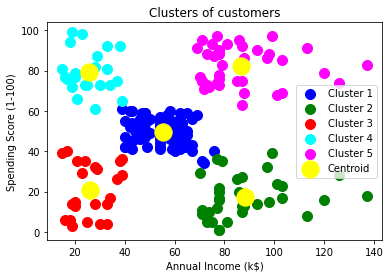

In [8]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

In above lines of code, we have written code for each clusters, ranging from 1 to 5. The first coordinate of the mtp.scatter, i.e., x[y_predict == 0, 0] containing the x value for the showing the matrix of features values, and the y_predict is ranging from 0 to 1.

The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

- Cluster1 shows the customers with average salary and average spending so we can categorize these customers as
- Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful.
- Cluster3 shows the low income and also low spending so they can be categorized as sensible.
- Cluster4 shows the customers with low income with very high spending so they can be categorized as careless.
- Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.

# Perceptron Algorithm
The Perceptron algorithm is a **two-class (binary) classification** machine learning algorithm.

It is a type of **neural network model**, perhaps the simplest type of neural network model.

It consists of a single node or neuron that takes a row of data as input and predicts a class label. This is achieved by calculating the weighted sum of the inputs and a bias (set to 1). The weighted sum of the input of the model is called the activation.

$Activation = Weights * Inputs + Bias$

If the activation is above 0.0, the model will output 1.0; otherwise, it will output 0.0.

- Predict 1: If Activation > 0.0
- Predict 0: If Activation <= 0.0

The Perceptron is a **linear classification algorithm**. This means that it learns a decision boundary that separates two classes using a line (called a **hyperplane**) in the feature space. As such, it is appropriate for those problems where the classes can be separated well by a line or linear model, referred to as **linearly separable**.

The coefficients of the model are referred to as input weights and are trained using the **stochastic gradient descent** optimization algorithm.

## Perceptron With Scikit-Learn
The Perceptron algorithm is available in the scikit-learn Python machine learning library via the Perceptron class.

The class allows you to configure the learning rate (eta0), which defaults to 1.0.

First, let’s define a synthetic classification dataset.We will use the make_classification() function to create a dataset with 1,000 examples, each with 20 input variables.

The example creates and summarizes the dataset.

In [9]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, 
                           n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [10]:
# define model
from sklearn.linear_model import Perceptron

model = Perceptron(eta0=1.0)

The implementation also allows you to configure the total number of training epochs (max_iter), which defaults to 1,000.

In [11]:
# define model
model = Perceptron(max_iter=1000)

The scikit-learn implementation of the Perceptron algorithm also provides other configuration options that you may want to explore, such as early stopping and the use of a penalty loss.

In [12]:
#complete example
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=10, n_redundant=0, 
                           random_state=1)
# define model
model = Perceptron(max_iter=1000, verbose=3)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.052)


Running the example evaluates the Perceptron algorithm on the synthetic dataset and reports the average accuracy across the three repeats of 10-fold cross-validation.

In [13]:
# Make predictions

# make a prediction with a perceptron model on the dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_informative=10, 
                           n_redundant=0, random_state=1)
# define model
model = Perceptron()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,
       -1.82114386,1.75466361,0.1243966,
       1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


## Tune Perceptron Hyperparameters
The hyperparameters for the Perceptron algorithm must be configured for your specific dataset.

Perhaps the most important hyperparameter is the learning rate.

A large learning rate can cause the model to learn fast, but perhaps at the cost of lower skill. A smaller learning rate can result in a better-performing model but may take a long time to train the model.

In [14]:
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [15]:
# grid search learning rate for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.001}
>0.853 with: {'eta0': 0.01}
>0.847 with: {'eta0': 0.1}
>0.847 with: {'eta0': 1.0}


Another important hyperparameter is how many epochs are used to train the model.

In [16]:
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]

In [17]:
# define model
#We will use our well-performing learning rate of 0.0001 found in the previous search.


model = Perceptron(eta0=0.0001)

In [18]:
# grid search total epochs for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'max_iter': 10}
>0.850 with: {'max_iter': 1}
>0.857 with: {'max_iter': 10}
>0.857 with: {'max_iter': 100}
>0.857 with: {'max_iter': 1000}
>0.857 with: {'max_iter': 10000}


# Neural Networks



### Keras Tutorial Overview

The steps we are going to cover in this tutorial are as follows:

- Load Data.
- Define Keras Model.
- Compile Keras Model.
- Fit Keras Model.
- Evaluate Keras Model.
- Tie It All Together.
- Make Predictions

This Keras tutorial has a few requirements:

- You have Python 2 or 3 installed and configured.
- You have SciPy (including NumPy) installed and configured.
- You have Keras and a backend (Theano or TensorFlow) installed and configured.

### 1. Load Data
The first step is to define the functions and classes we intend to use in this tutorial.

We will use the NumPy library to load our dataset and we will use two classes from the Keras library to define our model.

The imports required are listed below.

In [19]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


We can now load the file as a matrix of numbers using the NumPy function loadtxt().

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).

The variables can be summarized as follows:

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (y):
- Class variable (0 or 1)

Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

We can split the array into two arrays by selecting subsets of columns using the standard NumPy slice operator or “:” We can select the first 8 columns from index 0 to index 7 via the slice 0:8. We can then select the output column (the 9th variable) via index 8.

In [20]:
# load the dataset
from numpy import loadtxt

dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

### 2. Define Keras Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

- The model expects rows of data with 8 variables (the input_dim=8 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.


In [21]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

__Note__, the most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

### 3. Compile Keras Model
Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.



In [22]:
# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


### 4. Fit Keras Model
We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

- Epoch: One pass through all of the rows in the training dataset.
- Batch: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)


This is where the work happens on your CPU or GPU.

### Check if your GPU is working
Requirements:

- tensorflow - 2.1.0
- tensorflow-base - 2.1.0
- tensorflow-estimator - 2.1.0
- tensorflow-gpu - 2.1.0
- keras - 2.3.1 
- keras - 2.3.1
- cudnn - 7.6.5
- cudatoolkit - 10.1.243
- python = 3.6.13

In [23]:
from __future__ import print_function, division
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import numpy as np

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15989299439290721698
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3057333044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17961919326302624228
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


### 5. Evaluate Keras Model
We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

### 6. Tie It All Together
You have just seen how you can easily create your first neural network model in Keras.

Let’s tie it all together into a complete code example.

In [24]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
768/768 [==============================] - 1s 929us/step - loss: 22.5737 - accuracy: 0.6510
Epoch 2/150
768/768 [==============================] - 0s 518us/step - loss: 4.9057 - accuracy: 0.5951
Epoch 3/150
768/768 [==============================] - 0s 455us/step - loss: 1.5005 - accuracy: 0.5742
Epoch 4/150
768/768 [==============================] - 0s 440us/step - loss: 0.9397 - accuracy: 0.6068
Epoch 5/150
768/768 [==============================] - 0s 478us/step - loss: 0.8309 - accuracy: 0.6159
Epoch 6/150
768/768 [==============================] - 0s 453us/step - loss: 0.7823 - accuracy: 0.5951
Epoch 7/150
768/768 [==============================] - 0s 408us/step - loss: 0.7474 - accuracy: 0.6120
Epoch 8/150
768/768 [==============================] - 0s 470us/step - loss: 0.7325 - accuracy: 0.6198
Epoch 9/150
768/768 [==============================] - 0s 464us/step - loss: 0.7059 - accuracy: 0.6107
Epoch 10/150
768/768 [==============================] - 0s 425us/step - 

### 7. Make Predictions
The number one question I get asked is:

After I train my model, how can I use it to make predictions on new data?

Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

For example:

In [25]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

Alternately, we can call the predict_classes() function on the model to predict crisp classes directly, for example:

In [26]:
# make class predictions with the model
predictions = model.predict_classes(X)

In [27]:
# Complete Example

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=3)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


Specifically, you learned the six key steps in using Keras to create a neural network or deep learning model, step-by-step including:

1. How to load data.
2. How to define a neural network in Keras.
3. How to compile a Keras model using the efficient numerical backend.
4. How to train a model on data.
5. How to evaluate a model on data.
6. How to make predictions with the model.

Keras Tutorial Extensions

This section provides some extensions that you might want to explore.

- Tune the Model. Change the configuration of the model or training process and see if you can improve the performance of the model, e.g. achieve better than 76% accuracy.
- Save the Model. Update the tutorial to save the model to file, then load it later and use it to make predictions (see this tutorial).
- Summarize the Model. Update the tutorial to summarize the model and create a plot of model layers (see this tutorial).
- Separate Train and Test Datasets. Split the loaded dataset into a train and test set (split based on rows) and use one set to train the model and the other set to estimate the performance of the model on new data.
- Plot Learning Curves. The fit() function returns a history object that summarizes the loss and accuracy at the end of each epoch. Create line plots of this data, called learning curves (see this tutorial).
- Learn a New Dataset. Update the tutorial to use a different tabular dataset, perhaps from the UCI Machine Learning Repository.
- Use Functional API. Update the tutorial to use the Keras Functional API for defining the model.


# How to Tune Batch Size and Number of Epochs
The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

The number of epochs is the number of times that the entire training dataset is shown to the network during training. Some networks are sensitive to the batch size, such as LSTM recurrent neural networks and Convolutional Neural Networks.

Here we will evaluate a suite of different mini batch sizes from 10 to 100 in steps of 20.

The full code listing is provided below.

In [28]:
print("hello")

hello


In [29]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=3)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [32]:
grid_result.best_score_

0.7005208333333334

In [33]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 100}

# How to Tune the Training Optimization Algorithm
Keras offers a suite of different state-of-the-art optimization algorithms.

In this example, we tune the optimization algorithm used to train the network, each with default parameters.

This is an odd example, because often you will choose one approach a priori and instead focus on tuning its parameters on your problem (e.g. see the next example).

Here we will evaluate the suite of optimization algorithms supported by the Keras API.

The full code listing is provided below.

In [34]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=2)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
 - 1s - loss: 29.5959 - accuracy: 0.3724
Epoch 2/100
 - 1s - loss: 8.1678 - accuracy: 0.5664
Epoch 3/100
 - 0s - loss: 4.3889 - accuracy: 0.6042
Epoch 4/100
 - 0s - loss: 3.1386 - accuracy: 0.6172
Epoch 5/100
 - 0s - loss: 2.4003 - accuracy: 0.6159
Epoch 6/100
 - 0s - loss: 1.7941 - accuracy: 0.6276
Epoch 7/100
 - 0s - loss: 1.4026 - accuracy: 0.6198
Epoch 8/100
 - 0s - loss: 1.1636 - accuracy: 0.6211
Epoch 9/100
 - 0s - loss: 1.0638 - accuracy: 0.6263
Epoch 10/100
 - 0s - loss: 0.9774 - accuracy: 0.6406
Epoch 11/100
 - 0s - loss: 0.9422 - accuracy: 0.6432
Epoch 12/100
 - 0s - loss: 0.8833 - accuracy: 0.6562
Epoch 13/100
 - 0s - loss: 0.8560 - accuracy: 0.6536
Epoch 14/100
 - 0s - loss: 0.8460 - accuracy: 0.6589
Epoch 15/100
 - 0s - loss: 0.8302 - accuracy: 0.6615
Epoch 16/100
 - 0s - loss: 0.7990 - accuracy: 0.6680
Epoch 17/100
 - 0s - loss: 0.7919 - accuracy: 0.6797
Epoch 18/100
 - 0s - loss: 0.7436 - accuracy: 0.6784
Epoch 19/100
 - 0s - loss: 0.7379 - accuracy: 0.6732
E

# How to Tune Learning Rate and Momentum
It is common to pre-select an optimization algorithm to train your network and tune its parameters.

By far the most common optimization algorithm is plain old Stochastic Gradient Descent (SGD) because it is so well understood. In this example, we will look at optimizing the SGD learning rate and momentum parameters.

Learning rate controls how much to update the weight at the end of each batch and the momentum controls how much to let the previous update influence the current weight update.

We will try a suite of small standard learning rates and a momentum values from 0.2 to 0.8 in steps of 0.2, as well as 0.9 (because it can be a popular value in practice).

Generally, it is a good idea to also include the number of epochs in an optimization like this as there is a dependency between the amount of learning per batch (learning rate), the number of updates per epoch (batch size) and the number of epochs.

The full code listing is provided below.

In [36]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
768/768 [==============================] - 1s 773us/step - loss: 3.6562 - accuracy: 0.5742
Epoch 2/100
768/768 [==============================] - 0s 455us/step - loss: 1.7209 - accuracy: 0.5951
Epoch 3/100
768/768 [==============================] - 0s 495us/step - loss: 1.1129 - accuracy: 0.6146
Epoch 4/100
768/768 [==============================] - 0s 499us/step - loss: 0.9985 - accuracy: 0.6107
Epoch 5/100
768/768 [==============================] - 0s 477us/step - loss: 0.9442 - accuracy: 0.6029
Epoch 6/100
768/768 [==============================] - 0s 566us/step - loss: 0.8014 - accuracy: 0.6393
Epoch 7/100
768/768 [==============================] - 0s 470us/step - loss: 0.7428 - accuracy: 0.6263
Epoch 8/100
768/768 [==============================] - 0s 483us/step - loss: 0.7991 - accuracy: 0.6159
Epoch 9/100
768/768 [==============================] - 0s 421us/step - loss: 0.7612 - accuracy: 0.6328
Epoch 10/100
768/768 [==============================] - 0s 544us/step - l

# How to Tune Network Weight Initialization
Neural network weight initialization used to be simple: use small random values.

Now there is a suite of different techniques to choose from. Keras provides a laundry list.

In this example, we will look at tuning the selection of network weight initialization by evaluating all of the available techniques.

We will use the same weight initialization method on each layer. Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer. In the example below we use rectifier for the hidden layer. We use sigmoid for the output layer because the predictions are binary.

The full code listing is provided below.

In [37]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.718750 using {'init_mode': 'glorot_normal'}
0.709635 (0.015733) with: {'init_mode': 'uniform'}
0.704427 (0.006639) with: {'init_mode': 'lecun_uniform'}
0.713542 (0.011201) with: {'init_mode': 'normal'}
0.651042 (0.024774) with: {'init_mode': 'zero'}
0.718750 (0.000000) with: {'init_mode': 'glorot_normal'}
0.688802 (0.016367) with: {'init_mode': 'glorot_uniform'}
0.688802 (0.020256) with: {'init_mode': 'he_normal'}
0.687500 (0.005524) with: {'init_mode': 'he_uniform'}


# How to Tune the Neuron Activation Function
The activation function controls the non-linearity of individual neurons and when to fire.

Generally, the rectifier activation function is the most popular, but it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems.

In this example, we will evaluate the suite of different activation functions available in Keras. We will only use these functions in the hidden layer, as we require a sigmoid activation function in the output for the binary classification problem.

Generally, it is a good idea to prepare data to the range of the different transfer functions, which we will not do in this case.

The full code listing is provided below.

In [38]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.723958 using {'activation': 'softplus'}
0.657552 (0.003683) with: {'activation': 'softmax'}
0.723958 (0.025976) with: {'activation': 'softplus'}
0.684896 (0.003683) with: {'activation': 'softsign'}
0.717448 (0.024360) with: {'activation': 'relu'}
0.697917 (0.030647) with: {'activation': 'tanh'}
0.695312 (0.013902) with: {'activation': 'sigmoid'}
0.691406 (0.016877) with: {'activation': 'hard_sigmoid'}
0.704427 (0.001841) with: {'activation': 'linear'}


# How to Tune Dropout Regularization
In this example, we will look at tuning the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

To get good results, dropout is best combined with a weight constraint such as the max norm constraint.

This involves fitting both the dropout percentage and the weight constraint. We will try dropout percentages between 0.0 and 0.9 (1.0 does not make sense) and maxnorm weight constraint values between 0 and 5.

The full code listing is provided below.

In [ ]:
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# How to Tune the Number of Neurons in the Hidden Layer
The number of neurons in a layer is an important parameter to tune. Generally the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology.

Also, generally, a large enough single layer network can approximate any other neural network, at least in theory.

In this example, we will look at tuning the number of neurons in a single hidden layer. We will try values from 1 to 30 in steps of 5.

A larger network requires more training and at least the batch size and number of epochs should ideally be optimized with the number of neurons.

The full code listing is provided below.

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=8, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Tips for Hyperparameter Optimization
This section lists some handy tips to consider when tuning hyperparameters of your neural network.

- **k-fold Cross Validation**. You can see that the results from the examples in this post show some variance. A default cross-validation of 3 was used, but perhaps k=5 or k=10 would be more stable. Carefully choose your cross validation configuration to ensure your results are stable.
- **Review the Whole Grid**. Do not just focus on the best result, review the whole grid of results and look for trends to support configuration decisions.
- **Parallelize**. Use all your cores if you can, neural networks are slow to train and we often want to try a lot of different parameters. Consider spinning up a lot of AWS instances.
- **Use a Sample of Your Dataset**. Because networks are slow to train, try training them on a smaller sample of your training dataset, just to get an idea of general directions of parameters rather than optimal configurations.
- **Start with Coarse Grids**. Start with coarse-grained grids and zoom into finer grained grids once you can narrow the scope.
- **Do not Transfer Results**. Results are generally problem specific. Try to avoid favorite configurations on each new problem that you see. It is unlikely that optimal results you discover on one problem will transfer to your next project. Instead look for broader trends like number of layers or relationships between parameters.
- **Reproducibility is a Problem**. Although we set the seed for the random number generator in NumPy, the results are not 100% reproducible. There is more to reproducibility when grid searching wrapped Keras models than is presented in this post